In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import sklearn as sk
import os 
import openpyxl as xl
import math
import re
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams["figure.figsize"] = (10,6)

In [62]:
# Read in data 
daily = pd.read_csv("data/day_wise.csv")
daily.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [63]:
# Convert to datetime object
daily["Date"]=pd.to_datetime(daily["Date"])
daily=daily.set_index("Date")

Text(0.5, 1, 'Number Confirmed Cases World Wide Over Time')

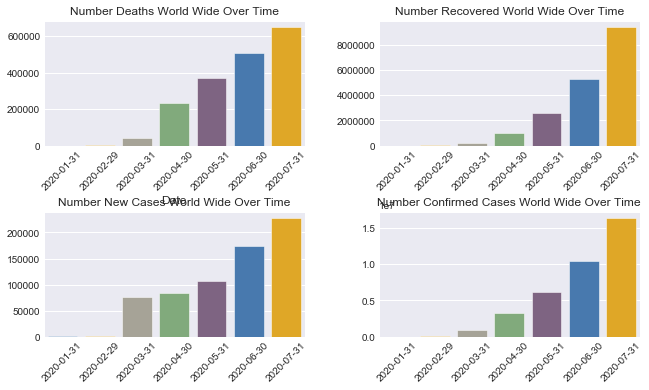

In [64]:
# Compare New Cases, Deaths, Recovered, and Confirmed
deaths    = daily["Deaths"].resample("M").last()
recovered = daily["Recovered"].resample("M").last()
new       = daily["New cases"].resample("M").last()
confirmed = daily["Confirmed"].resample("M").last()

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_style("darkgrid")

f, axes = plt.subplots(2, 2)
f.tight_layout(pad=5.0)

sns.barplot(deaths.index, deaths.values,palette=sns.xkcd_palette(colors), ax=axes[0,0])
axes[0,0].set_title("Number Deaths World Wide Over Time",fontdict={"size":12})
axes[0,0].set_xticklabels(deaths.index.strftime("%Y-%m-%d"),rotation=45)

sns.barplot(recovered.index.strftime("%Y-%m-%d"), recovered.values,palette=sns.xkcd_palette(colors), ax=axes[0,1])
axes[0,1].set_xticklabels(recovered.index.strftime("%Y-%m-%d"),rotation=45)
axes[0,1].set_title("Number Recovered World Wide Over Time",fontdict={"size":12})

sns.barplot(new.index.strftime("%Y-%m-%d"), new.values,palette=sns.xkcd_palette(colors), ax=axes[1,0])
axes[1,0].set_xticklabels(new.index.strftime("%Y-%m-%d"),rotation=45)
axes[1,0].set_title("Number New Cases World Wide Over Time",fontdict={"size":12})

sns.barplot(confirmed.index.strftime("%Y-%m-%d"), confirmed.values,palette=sns.xkcd_palette(colors), ax=axes[1,1])
axes[1,1].set_xticklabels(confirmed.index.strftime("%Y-%m-%d"),rotation=45)
axes[1,1].set_title("Number Confirmed Cases World Wide Over Time",fontdict={"size":12})

Text(0.5, 1.0, 'Number of World Wide Recovered Over Time')

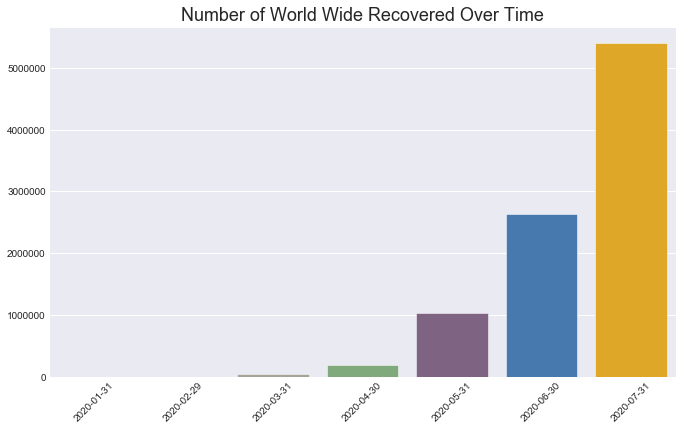

In [65]:
# Recovery Rate 
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
recovered=daily["Recovered"].resample("M").first()
sns.set_style("darkgrid")
sns.barplot(recovered.index.strftime("%Y-%m-%d"), recovered.values,palette=sns.xkcd_palette(colors))
plt.xticks(rotation=45)
plt.title("Number of World Wide Recovered Over Time",fontdict={"size":18})

In [66]:
daily.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

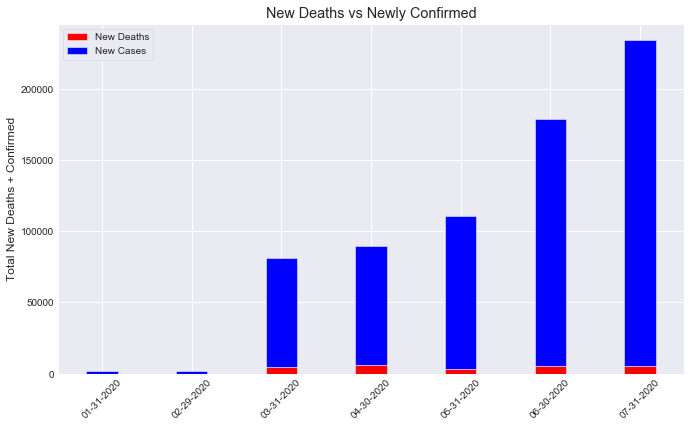

In [67]:
# Stacked bar chart of New Cases to New Deaths
new_deaths= daily["New deaths"].resample("M").last()
idx = np.arange(0,new_deaths.index.shape[0])

width=0.35

p1 = plt.bar(idx,new_deaths.values,width=width, color="r")
p2 = plt.bar(idx,new.values, bottom = new_deaths.values, width=width, color="b")

plt.ylabel('Total New Deaths + Confirmed')
plt.title('New Deaths vs Newly Confirmed')
plt.xticks(idx,new_deaths.index.strftime("%m-%d-%Y"),rotation=45)
plt.legend((p1[0], p2[0]), ('New Deaths', 'New Cases'))
plt.show()

In [68]:
# Top 10 days with deaths
daily["New deaths"].sort_values(ascending=False)[:10].apply(lambda x: "{:,}".format(x))

Date
2020-07-23    9,966
2020-04-17    8,890
2020-04-15    8,312
2020-04-07    7,902
2020-04-09    7,629
2020-04-16    7,283
2020-04-10    7,272
2020-04-21    7,157
2020-07-22    6,983
2020-04-14    6,898
Name: New deaths, dtype: object

In [69]:
# Top 10 days with New Cases
daily["New cases"].sort_values(ascending=False)[:10].apply(lambda x: "{:,}".format(x))

Date
2020-07-23    282,756
2020-07-24    281,164
2020-07-22    280,647
2020-07-25    255,545
2020-07-16    252,544
2020-07-17    242,038
2020-07-18    237,635
2020-07-21    233,565
2020-07-10    232,577
2020-07-15    231,122
Name: New cases, dtype: object

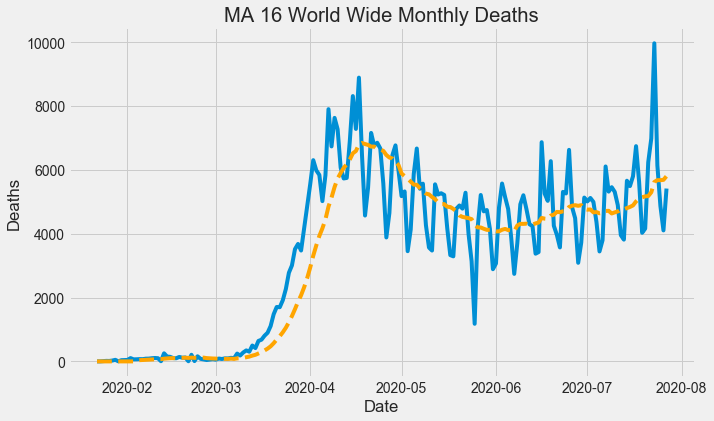

In [70]:
# Moving average of deaths 
plt.style.use('fivethirtyeight')
daily["MA14 New Deaths"]=daily["New deaths"].rolling(14).mean().fillna(0)
plt.plot(daily.index,daily["New deaths"])
plt.plot(daily.index,daily["MA14 New Deaths"], color="orange",linestyle="--")
plt.title("MA 16 World Wide Monthly Deaths")
plt.ylabel("Deaths")
plt.xlabel("Date")
plt.show()

In [71]:
# Analyze covid19 cases by country and usa since its separate
covid = pd.read_csv("data/covid_19_clean_complete.csv")
usa   = pd.read_csv("data/usa_county_wise.csv")
covid.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [72]:
covid.shape

(49068, 10)

In [73]:
covid.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [74]:
# Convert Date to datetime 
covid["Date"] = covid["Date"].apply(pd.to_datetime)
covid.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [75]:
usa.head()

UID iso2 iso3  code3     FIPS    Admin2            Province_State  \
0        16   AS  ASM     16     60.0       NaN            American Samoa   
1       316   GU  GUM    316     66.0       NaN                      Guam   
2       580   MP  MNP    580     69.0       NaN  Northern Mariana Islands   
3  63072001   PR  PRI    630  72001.0  Adjuntas               Puerto Rico   
4  63072003   PR  PRI    630  72003.0    Aguada               Puerto Rico   

  Country_Region        Lat       Long_                  Combined_Key  \
0             US -14.271000 -170.132000            American Samoa, US   
1             US  13.444300  144.793700                      Guam, US   
2             US  15.097900  145.673900  Northern Mariana Islands, US   
3             US  18.180117  -66.754367     Adjuntas, Puerto Rico, US   
4             US  18.360255  -67.175131       Aguada, Puerto Rico, US   

      Date  Confirmed  Deaths  
0  1/22/20          0       0  
1  1/22/20          0       0  
2  1/22/20          0       0  
3  1/22/20          0       0  
4  1/22/20          0       0

In [76]:
# Convert Date to datetime 
usa["Date"] = pd.to_datetime(usa["Date"])

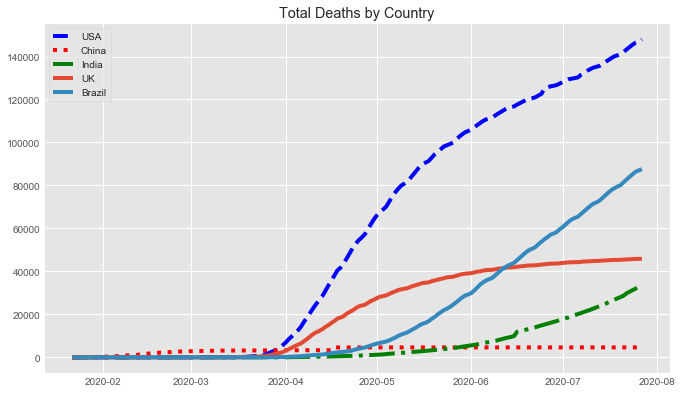

In [87]:
# Plot deaths in various countries 
plt.style.use("ggplot")
covid_figures = covid[['Country/Region', 'Date', 'Confirmed','Deaths', 'Recovered', 'Active']].groupby(by=["Country/Region","Date"]).sum().reset_index() 

usa_figures    = usa[["Date","Confirmed","Deaths"]].groupby(by=["Date"]).sum().reset_index() 
china_figures  = covid_figures.loc[covid_figures['Country/Region']=="China",:]
india_figures  = covid_figures.loc[covid_figures['Country/Region']=="India",:]
uk_figures     = covid_figures.loc[covid_figures['Country/Region']=="United Kingdom",:]
brazil_figures = covid_figures.loc[covid_figures['Country/Region']=="Brazil",:]

plt.plot(usa_figures["Date"],usa_figures["Deaths"], label="USA", linestyle="--", color="blue")
plt.plot(china_figures["Date"], china_figures["Deaths"], label="China", linestyle=":", color="red")
plt.plot(india_figures["Date"],india_figures["Deaths"], label="India", linestyle="-.", color="green")
plt.plot(uk_figures["Date"],uk_figures["Deaths"], label="UK")
plt.plot(brazil_figures["Date"],brazil_figures["Deaths"], label="Brazil")
plt.legend()
plt.title("Total Deaths by Country")
plt.show()

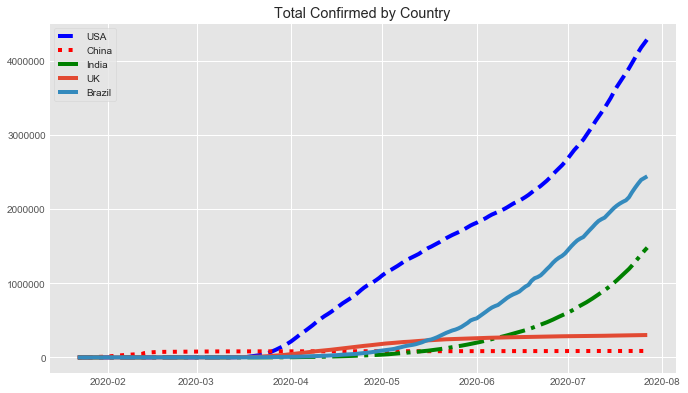

In [88]:
# Confirmation rate

plt.plot(usa_figures["Date"],usa_figures["Confirmed"], label="USA", linestyle="--", color="blue")
plt.plot(china_figures["Date"], china_figures["Confirmed"], label="China", linestyle=":", color="red")
plt.plot(india_figures["Date"],india_figures["Confirmed"], label="India", linestyle="-.", color="green")
plt.plot(uk_figures["Date"],uk_figures["Confirmed"], label="UK")
plt.plot(brazil_figures["Date"],brazil_figures["Confirmed"], label="Brazil")
plt.legend()
plt.title("Total Confirmed by Country")
plt.show()

In [78]:
# Plot of New Cases by various countries
plt.style.use('ggplot')
